<a href="https://colab.research.google.com/github/jaishrm07/pytorch-end-to-end/blob/main/01_pytorch_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

let's explore an example PyTorch end-to-end workflow.

Resources:
* Book version of notebook - https://www.learnpytorch.io/

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for NN
import matplotlib.pyplot as plt

# check the PyTorch version
torch.__version__

'2.4.0+cu121'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.


In [ ]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# create

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
X.shape

torch.Size([50, 1])

### Spiltting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This where the data explorer's motto comes in!

"Visualize, visualize, visualize"

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(8, 6))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 10});


#plt.plot(X_train, y_train)

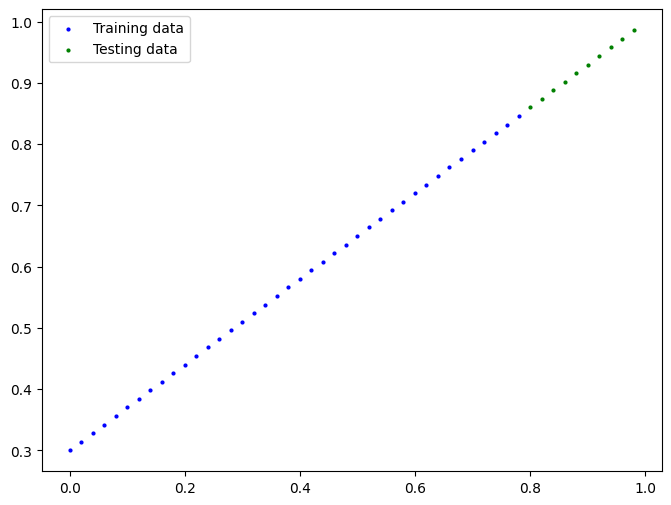

In [ ]:
plot_predictions();

## 2. Build Model

Our first PyTorch Model

getting familiar with OOP in Python.
https://realpython.com/


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?
1. Gradient descent
2. Backpropagation

In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__() # child class inherits attributes of parent class
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <-  "x" is the input data
    return self.weights * x + self.bias # this is the linear regression


In [ ]:
# Every module in pytorch inherits from nn.module. any sub-class needs to override the forward method of parent class.

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a NN can be consisdered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base calss for all NN modules, if you subclass it, you should override forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method

### Checking the contents of our PyTorch Model

Now we've created a model, let's see what's inside....

So we can check our model parameters or what's inside our model using *parameters()*

In [ ]:
# Create a random seed
torch.manual_seed(42)


# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using *torch.inference_model()*

To check our model's predictive power, let's see how well it predicts y_test based on X_test

When we pass data through our model, it's going to run it through the forward() method.

In [ ]:
# Make predictions with model:
with torch.inference_mode():  # turns off gradient tracking. saves memory, runs faster.
  y_preds = model_0(X_test)


# you can do something similar with torch.no_grad but inference mode is preferred.
# with torch.no_grad()

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

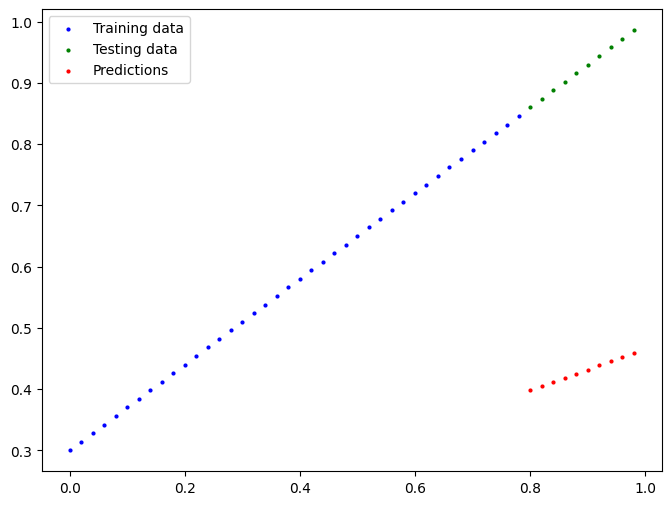

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.
Or in other words from a poor representation of the data to a better representation of tha data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. FOr our case, we'are going to refer to it as a loss function.

Things we need to train:

* **Loss function: ** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* Optimizer : Takes into account the loss of a model and adjusts the model's paramters (e.g. weights & bias) to improve the loss function.


And specifically for PyTorch, we need:

* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss() # mean absolute error (MAE)



# Setup an optimizer
# Adadelta, Adagrad, Adam, SGD(Stochastic Gradient Descent), Rprop, SpaseAdam
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set.

**Q**: Which loss function and optimizer should i use?
**A**: This will be problem specific.

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
1. Loop through the data
2. Forward pass (this involves data moving through our model's forward graph.
3. Calculate the loss
4. OPtimizer zero grad
5. Loss backward: (**backpropagation**)
6. Optimizer step: (**gradient descent**)

In [ ]:
with torch.inference_mode():
  list(model_0.parameters())

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data...(this is a hyperparameter)
epochs = 1000

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training ###
# 1. loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters

  # 2. Forward Pass
  y_pred = model_0(X_train)

  # 3. calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss({epoch}): {loss}")

  # 4. optimizer zero grad
  optimizer.zero_grad()

  # 5. perfrom backpropagation on the loss with respect to the parameters of the model.
  loss.backward()

  # 6. step the optimizer (perfrom SGD)
  optimizer.step()

  ### Testing

  model_0.eval() # turns of gradient tracking
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pred =model_0(X_test)

    # 2. Calculate the los
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    print(model_0.state_dict(), "\n")




Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))]) 

Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))]) 

Epoch: 200 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))]) 

Epoch: 300 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))]) 

Epoch: 400 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))]) 

Epoch: 500 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))]) 

Epoch: 600 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.69

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds_new= model_0(X_test)

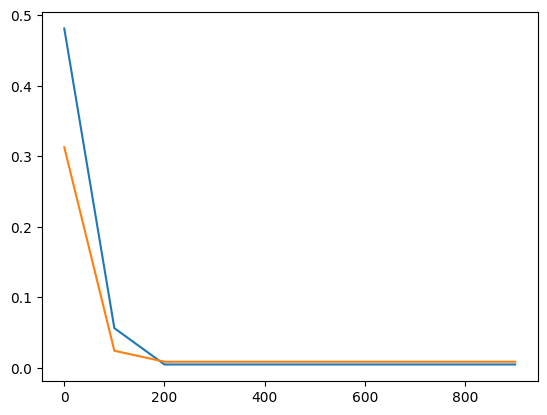

In [ ]:
# Plot the loss values
# loss_values_np = loss_values.numpy()
# test_loss_values_np = test_loss_values.numpy()

plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label = "Train loss")

In [ ]:
model_0

LinearRegressionModel()

## Saving a model a PyTorch


There are three main methods

1. torch.save() - allows you save a Pytorch object in python's pickle format
2. torch.load() - allows you load a saved pytorch object
3. torch.nn.Module.load_state_dict() - this allows to load a model's

https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# saveing our pytorch model
from pathlib import Path

# 1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# 3. SAVE THE MODEL STAT DICT
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to : models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Sep 15 04:14 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's state_dict() rather than entire model, we'll create a new isntance of our model class and load the saved state_dict()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-193-5d9916468179>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# MAKE SOME predictions

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
pwd

'/content'

In [ ]:
cd /content

/content


In [ ]:
ls

models/  sample_data/


In [ ]:
ls

drive/  models/  sample_data/


In [ ]:
cd drive

/content/drive


In [ ]:
pwd

'/content/drive'

In [ ]:
! cat ~/.gitconfig

cat: /root/.gitconfig: No such file or directory
